<a href="https://colab.research.google.com/github/vilokguliani/Misc_Tools/blob/main/YCBS255_Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 **<font color="blue"> (15 points )<font>**

------
### Notes and Instructions
  + You may need additional libraries besides the Python standard library to solve some questions. Import only necessary libraries.
  + If more than one library exist for a same purpose, choose the one you wish as long as it does the task properly.
  + If we want you to use a specific library, then we will state it clearly.
  + Use the exact variable names asked in the questions. When no clear instructions given, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells.
  + Use text cells for explanations. Use explanation and plain text as much as possible.
  + Do not remove or modify the original cells provided by the instructor.
  + In the following cell you will find some extra options to make your code more readable, including output colors RED, OKBLUE, or output text styles like BOLD or UNDERLINE that. Do not hesitate to use them. As an example, one may output text in red as follows:
  ```python
     print(bcolors.RED + "your text" + bcolors.ENDC)
  ```
  + Comment your code whenever needed using # sign at the beginning of the row.
  + In some questions some of the details needed for solving the problem are **purposely** omitted to encourage additional self-directed research. This, especially, helps you develop some search skills for coding in Python (which is inevitable due to the inconsistent syntax of Python).
  + Do not hesitate to communicate your questions to the TA's or instructors. Good luck!  
  

In [ ]:
# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

## Question 1 <font color="blue">(1 point)</font>

  1. **<font color="blue">(0.5 points)</font>** Write a Python **function** that takes two **positive integers** and returns their **greatest common divisor**. In case you pass a negative integer to the function it must return the following string **in red**: <br> <font color="red"> "This function takes only positive integers!" </font>
  2. **<font color="blue">(0.5 points)</font>** Write a function that prints all the prime numbers less than or equal to $n$, where $n$ is a parameter to be passed to the function. If $n \leq 1$ the function returns <br>
<font color="red">"No prime number was found!"</span>.

In [ ]:
#1 Define Function
def gcd(x, y):
    if x <= 0 or y <= 0:
        return f"{bcolors.RED}This function takes only positive integers!{bcolors.ENDC}"

    while y:
        x, y = y, x % y
    return x

#1 Valid Test Case
print(f"We got {gcd(2, 9)}")  # Should print: We got 1

#1 Invalid Test Case
print(f"We got {gcd(-1,8)}") #We expect string

We got 1
We got This function takes only positive integers!


In [ ]:
#1 Edge Test Case
print(gcd(8o,8)) #We expect this to cause an error

SyntaxError: invalid syntax (1887061733.py, line 2)

In [ ]:
#2
def is_prime(n):
    if n <= 1: #1 Is NOT prime
        return False
    if n <= 3: #All  numbers less than 3 are prime
        return True
    if n % 2 == 0 or n % 3 == 0: #This optimizes the code by removing numbers divisible by 2 or 3 immediately.
        return False
    i = 5
    while i * i <= n: #only check numbers of the form 6k ± 1 up to the square root of n.
        if n % i == 0 or n % (i + 2) == 0:
            return False
        i += 6
    return True

def primes_less_than_or_equal(x):
    primes = []
    for num in range(2, x+1):
        if is_prime(num):
            primes.append(num)
    return primes

# Example usage:
print(primes_less_than_or_equal(30))  # Should print: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]


## Question 2 <font color="blue">(6 points)</font>
Let $\mathbf X\sim \mbox{Exp}(\lambda)$, with parameter $\lambda = 1.2$.
  1. **<font color="blue">(0.5 points)</font>** What is the population mean?
  2. **<font color="blue">(1 point)</font>**  Generate $100$ different samples of $\mathbf X$, namely, $S_{100}, S_{200}, S_{300}, \dots, S_{10000}$, where indeces denote the number of observations (sample size) in each sample.
  3. **<font color="blue">(1.5 points)</font> Estimate** the population mean using each sample and explain the rationale behind your estimation.
  4. **<font color="blue">(1 point)</font>** Applying **appropriate** methods visualize and describe the values obtained in the previous step.
  5. **<font color="blue">(2 points)</font>** Finally, draw an inference about the population mean and its relation with sample means, based on visualized results in step 4.

In [ ]:
#1 Mean of Exponential Distribution
#Given we know X is the population, and X is an exponenial distribution, through the properties of an exponential distribution we know that the mean of the population is 1/𝜆
𝜆 = 1.2
μ = 1/𝜆

print(f"The population mean is  {bcolors.OKBLUE}{μ}{bcolors.ENDC}")

The population mean is  0.8333333333333334


In [ ]:
#2
import numpy as np
import pandas as pd

# Set the seed for reproducibility
np.random.seed(101)

# Define the lambda parameter for the exponential distribution
𝜆 = 1.2

#Define sample sizes
sample_sizes = np.arange(100, 10001, 100)

# Initialize an empty list to store dictionaries
output_data = []

# Generate samples for each sample size and store in the list
for size in sample_sizes:
    sample_mean = np.mean(np.random.exponential(scale=1/𝜆, size=size))
    sample_std = np.std(np.random.exponential(scale=1/𝜆, size=size))
    output_data.append({'Sample Size': size, 'Sample Mean': sample_mean, 'Sample Std': sample_std})

# Create a DataFrame from the list of dictionaries
output_df = pd.DataFrame(output_data)

# Print the output
print(output_df)

    Sample Size  Sample Mean  Sample Std
0           100     0.787483    0.813146
1           200     0.867237    0.791962
2           300     0.845335    0.829437
3           400     0.798044    0.776817
4           500     0.795456    0.826675
..          ...          ...         ...
95         9600     0.814914    0.836147
96         9700     0.842708    0.835781
97         9800     0.827255    0.824715
98         9900     0.828834    0.831113
99        10000     0.827283    0.839504

[100 rows x 3 columns]


In [ ]:
#3 Print the estimated population mean (and std for curiousity) from each sample
# Set the pandas display options
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
print(output_df)

    Sample Size  Sample Mean  Sample Std
0           100     0.787483    0.813146
1           200     0.867237    0.791962
2           300     0.845335    0.829437
3           400     0.798044    0.776817
4           500     0.795456    0.826675
5           600     0.953838    0.835092
6           700     0.852077    0.806165
7           800     0.832626    0.819063
8           900     0.864045    0.809906
9          1000     0.804337    0.812151
10         1100     0.797330    0.828017
11         1200     0.849119    0.888818
12         1300     0.823456    0.802549
13         1400     0.832123    0.845916
14         1500     0.866477    0.866423
15         1600     0.825742    0.821815
16         1700     0.837071    0.876944
17         1800     0.829551    0.811343
18         1900     0.830236    0.837876
19         2000     0.846558    0.868980
20         2100     0.834176    0.848849
21         2200     0.841873    0.807217
22         2300     0.798663    0.914503
23         2400 

3

    For each sample, we estimate the population mean using the sample mean
    The rationale behind using the sample mean to estimate the population mean is based on the Law of Large Numbers, which states that as the sample size increases, the sample mean will converge to the population mean.
    This property ensures that with sufficiently large sample sizes, the sample mean provides a good estimate of the population mean.

3

    After generating the samples and computing the sample means, we can observe the following:

    For smaller sample sizes (e.g., n=100), the sample mean may deviate more from the true population mean due to higher variability and less data.
    As the sample size increases (e.g., n=10000), the sample mean tends to converge to the true population mean (≈0.8333) due to the averaging effect of more data points and the Law of Large Numbers.
    Thus, the larger the sample size, the more reliable our estimate of the population mean will be.

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Sample Size', ylabel='Sample Mean'>

Text(0.5, 1.0, 'Sample Mean vs Sample Size')

Text(0.5, 0, 'Sample Size')

Text(0, 0.5, 'Sample Mean')

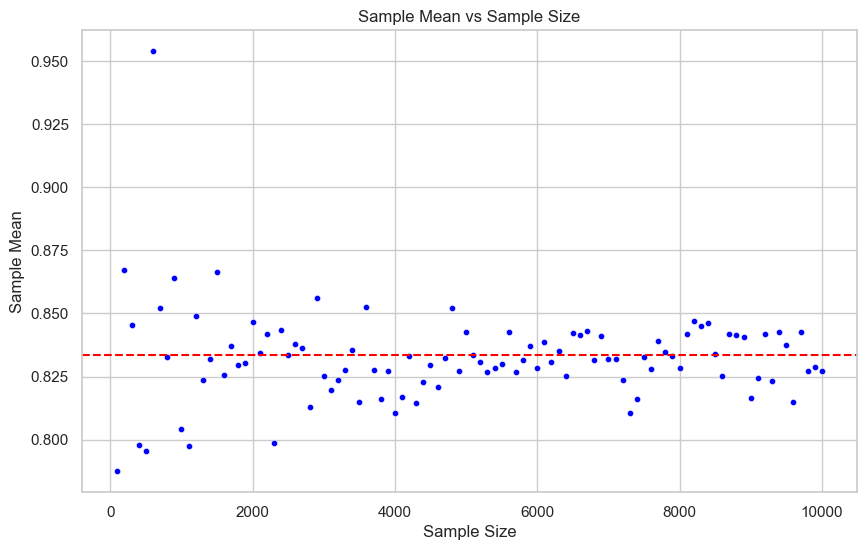

In [ ]:
#4
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=output_df, x='Sample Size', y='Sample Mean', color='blue', s=20)
plt.axhline(y=μ, color='red', linestyle='--', label='Population Mean')
plt.title('Sample Mean vs Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Sample Mean')
plt.show()

4

Each sample mean estimates the population mean. As the size of the sample increases, the estimate gets closer to the true population mean.

5

This visual shows that as the sample size increases, the sample means tends more towards the true population.
This is mainly visible for the first half, which suggests the law of large numbers is in effect. Beyond a sample size of 6000, there is a disproportionate amount of sample size needed to noticibly improve the accuracy.
This is useful as we can save our computing power and achieve high enough accuracy by using a sample size of ~6000, instead of i.e. 10M.

## Question 3 <font color="blue">(8 points)</font>
In this exercise you will create some simulated data and will fit simple
linear regression models to it. Make sure to fix the seed to $111$ prior to
starting.
  
  1. **<font color="blue">(0.25 points)</font>** Create a vector `x` containing $100$ observations drawn from a $\mathcal{N}(0, 1)$ distribution as your feature.
  2. **<font color="blue">(0.25 points)</font>** Create a vector, `eps` (for $\epsilon$), containing $100$ observations drawn from a $\mathcal{N}(0, 0.25)$.
  3. **<font color="blue">(0.5 points)</font>** Using `x` and `eps` generate a vector `y` according to the model $y = −1 + 0.5x + \epsilon$.
  4. **<font color="blue">(0.5 points)</font>** Create a scatterplot displaying the relationship between `x` and `y`. Comment on what you observe.
  5. **<font color="blue">(2 points)</font>** Fit a least squares linear model to predict `y` using `x` . Comment on the model obtained. How do $\hat{\beta}_0$ and $\hat{\beta}_1$ compare to $\beta_0$ and $\beta_1$?
  6. **<font color="blue">(2 point)</font>** Display the least squares line on the scatterplot obtained in part 4. Draw the population regression line on the plot, in a different color. Create an appropriate legend.
  7. **<font color="blue">(2.5 points)</font>** Explain how the result would change if you generate the data with less noise and repeat all steps 1 to 6? What about more noise?

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='x', ylabel='y'>

Text(0.5, 1.0, 'Scatterplot of x and y')

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

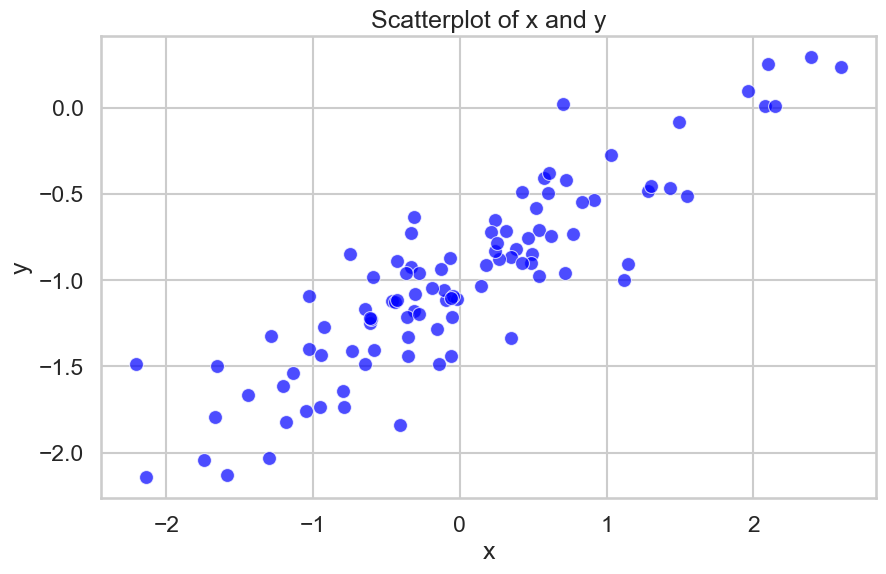

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seed for reproducibility
np.random.seed(111)

#1 Create a vector x containing 100 observations drawn from a N(0, 1) distribution
x = np.random.normal(loc=0, scale=1, size=100)

#2 Create a vector eps containing 100 observations drawn from a N(0, 0.25) distribution
eps = np.random.normal(loc=0, scale=0.25, size=100)

#3 Generate vector y according to the model y = -1 + 0.5x + eps
y = -1 + 0.5 * x + eps

#4 Create a DataFrame to store the data
data = pd.DataFrame({'x': x, 'y': y})

#4 Create a DataFrame from the list of dictionaries
output_df = pd.DataFrame(data)

#4 Create the scatterplot
sns.set(style="whitegrid", palette="muted", context="talk")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=output_df, x='x', y='y', color='blue', alpha=0.7, s=100)
plt.title('Scatterplot of x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

#4 The scatterplot shows a positive linear relationship between x and y. This is consistent with the model 𝑦=−1+0.5𝑥+𝜖
#The spread of points around the line indicates the presence of noise in the data.

In [ ]:
from sklearn.linear_model import LinearRegression

#5 Fit a linear regression model to predict y using x
model = LinearRegression().fit(data[['x']], data['y'])

#5 Print the model coefficients
Intercept = model.intercept_
Coefficient = model.coef_[0]

print("Intercept:", Intercept)
print(f"This 𝛽̂0 is very close to the true 𝛽0 of -1. In fact, it is only {bcolors.BOLD}{round((Intercept / -1 - 1) * 100, 2)}{bcolors.ENDC}% off")

print("Coefficient:", Coefficient)
print(f"This 𝛽̂1 is very close to the true 𝛽1 of 0.5. In fact, it is only {bcolors.BOLD}{round((Coefficient / 0.5 - 1) * 100, 2)}{bcolors.ENDC}% off")

#5 This indicates that the least squares linear model is accurately capturing the relationship between x and y.

Intercept: -0.991562059471384
This 𝛽̂0 is very close to the true 𝛽0 of -1. In fact, it is only -0.84% off
Coefficient: 0.4803576327350599
This 𝛽̂1 is very close to the true 𝛽1 of 0.5. In fact, it is only -3.93% off


<Figure size 800x600 with 0 Axes>

<Axes: xlabel='x', ylabel='y'>

Text(0.5, 1.0, 'Linear Regression Fit')

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

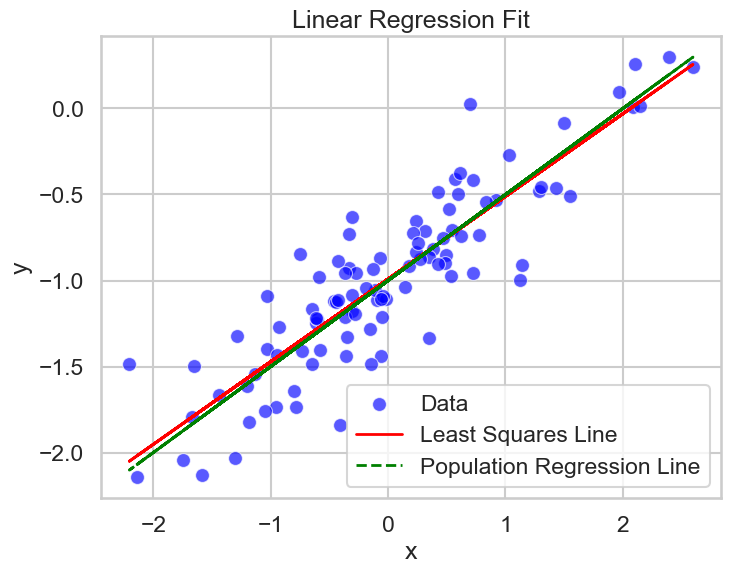

In [ ]:
#6 Predict y values based on the model
y_pred = model.predict(data[['x']])

#6 Plot the scatterplot, least squares line, and population regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='x', y='y', color='blue', alpha=0.65, s=100, label='Data')
plt.plot(data['x'], y_pred, color='red', linewidth=2, label='Least Squares Line')
plt.plot(data['x'], -1 + 0.5 * data['x'], color='green', linewidth=2, linestyle='--', label='Population Regression Line')
plt.title('Linear Regression Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

LinearRegression()

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='x', ylabel='y'>

Text(0.5, 1.0, 'Linear Regression Fit with Less Noise')

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

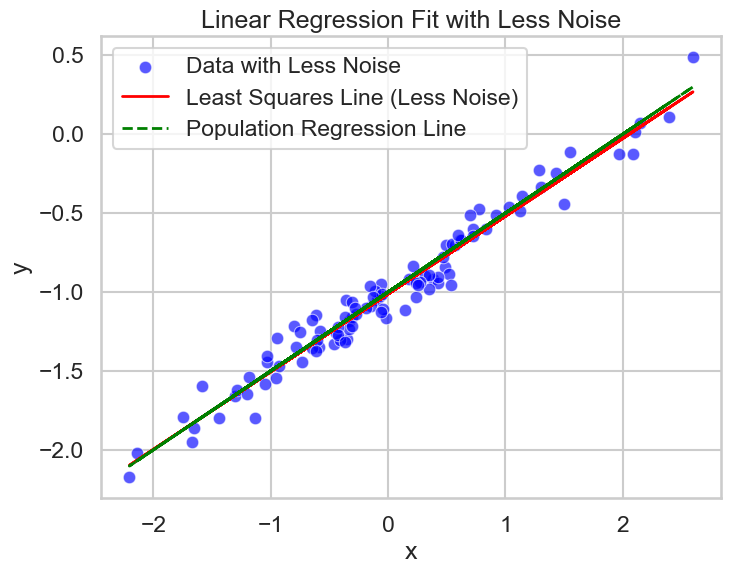

In [ ]:
#7
# Generate data with less noise
eps_less_noise = np.random.normal(loc=0, scale=0.1, size=100)
y_less_noise = -1 + 0.5 * x + eps_less_noise

# Fit the model and plot
data_less_noise = pd.DataFrame({'x': x, 'y': y_less_noise})
model_less_noise = LinearRegression()
model_less_noise.fit(data_less_noise[['x']], data_less_noise['y'])
y_pred_less_noise = model_less_noise.predict(data_less_noise[['x']])

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_less_noise, x='x', y='y', color='blue', alpha=0.65, label='Data with Less Noise')
plt.plot(data_less_noise['x'], y_pred_less_noise, color='red', linewidth=2, label='Least Squares Line (Less Noise)')
plt.plot(data_less_noise['x'], -1 + 0.5 * data_less_noise['x'], color='green', linewidth=2, linestyle='--', label='Population Regression Line')
plt.title('Linear Regression Fit with Less Noise')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

7

    Less Noise: When the data has less noise, the points in the scatterplot are closer to the regression line. The fitted model's coefficients will be closer to the true population values, and the R-squared value will be higher, indicating a better fit.

LinearRegression()

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='x', ylabel='y'>

Text(0.5, 1.0, 'Linear Regression Fit with More Noise')

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

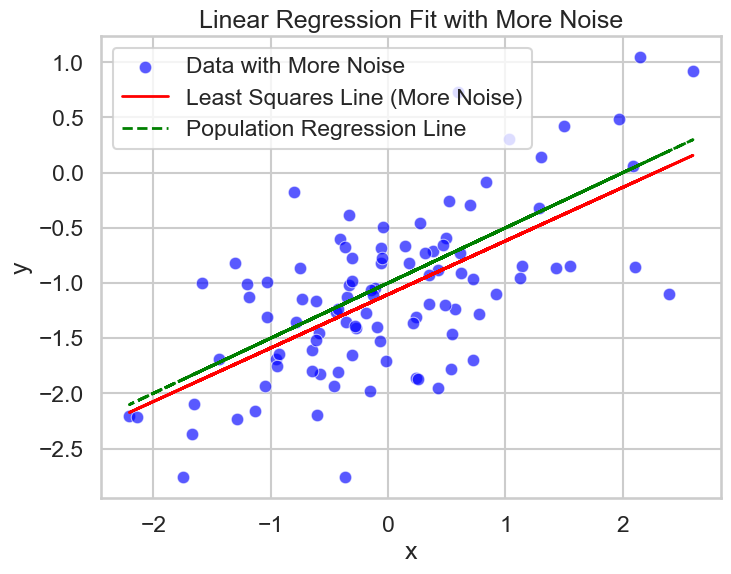

In [ ]:
#7
# Generate data with more noise
eps_more_noise = np.random.normal(loc=0, scale=0.5, size=100)
y_more_noise = -1 + 0.5 * x + eps_more_noise

# Fit the model and plot
data_more_noise = pd.DataFrame({'x': x, 'y': y_more_noise})
model_more_noise = LinearRegression()
model_more_noise.fit(data_more_noise[['x']], data_more_noise['y'])
y_pred_more_noise = model_more_noise.predict(data_more_noise[['x']])

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_more_noise, x='x', y='y', color='blue', alpha=0.65, label='Data with More Noise')
plt.plot(data_more_noise['x'], y_pred_more_noise, color='red', linewidth=2, label='Least Squares Line (More Noise)')
plt.plot(data_more_noise['x'], -1 + 0.5 * data_more_noise['x'], color='green', linewidth=2, linestyle='--', label='Population Regression Line')
plt.title('Linear Regression Fit with More Noise')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

7

    More Noise: With more noise, the points in the scatterplot are more spread out around the regression line. The fitted model's coefficients may deviate more from the true values, and the R-squared value will be lower, indicating a poorer fit.

7

    By adjusting the noise level, you can observe how noise impacts the accuracy and fit of the linear regression model.